## More Preprocessing Steps

In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

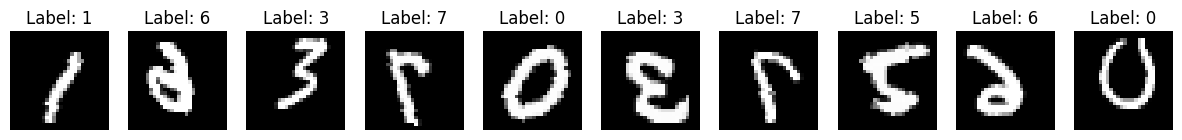

Epoch [1/5], Loss: 0.5347
Epoch [2/5], Loss: 0.2545
Epoch [3/5], Loss: 0.2012
Epoch [4/5], Loss: 0.1718
Epoch [5/5], Loss: 0.1516
Accuracy: 98.52%


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Step 1: Define the transformation pipeline with more preprocessing
transform = transforms.Compose([
    transforms.RandomRotation(10),                # Random rotation for data augmentation
    transforms.RandomHorizontalFlip(),            # Random horizontal flip for data augmentation
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random affine transformation
    transforms.ColorJitter(brightness=0.2, contrast=0.2),      # Color jitter for brightness & contrast
    transforms.ToTensor(),                        # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))          # Normalize pixel values to [-1, 1]
])

# Step 2: Load the MNIST dataset with the transformations applied
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
]))

# Step 3: Create DataLoader for batching and shuffling
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Step 4: Define a simple Convolutional Neural Network (CNN)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # First convolutional layer + pooling
        x = self.pool(torch.relu(self.conv2(x)))  # Second convolutional layer + pooling
        x = x.view(-1, 64*7*7)                   # Flatten
        x = torch.relu(self.fc1(x))              # Fully connected layer 1
        x = self.dropout(x)                      # Dropout for regularization
        x = self.fc2(x)                          # Fully connected layer 2 (output)
        return x

# Step 5: Create the model, define loss function and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Train the model
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()                 # Zero the parameter gradients
            outputs = model(images)               # Forward pass
            loss = criterion(outputs, labels)     # Compute the loss
            loss.backward()                       # Backward pass (compute gradients)
            optimizer.step()                      # Optimize weights
            
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Step 7: Evaluate the model on the test dataset
def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total:.2f}%')

# Step 8: Visualize the preprocessed images
def show_images(images, labels, num_images=10):
    images = images[:num_images]
    labels = labels[:num_images]
    images = images * 0.5 + 0.5  # Denormalize to [0, 1] for display
    
    fig, axes = plt.subplots(1, num_images, figsize=(15, 2))
    for idx in range(num_images):
        axes[idx].imshow(images[idx].squeeze(), cmap='gray')
        axes[idx].set_title(f"Label: {labels[idx].item()}")
        axes[idx].axis('off')
    plt.show()

# Step 9: Train, evaluate, and visualize
if __name__ == "__main__":
    # Show a batch of preprocessed images
    data_iter = iter(train_loader)
    images, labels = next(data_iter)
    show_images(images, labels)

    # Train the model
    train_model(model, train_loader, criterion, optimizer, epochs=5)
    
    # Evaluate the model
    evaluate_model(model, test_loader)


# Multi-Layer Perceptron

# Perceptron (Simplified)
## A Perceptron is the most basic unit of a neural network, often called an artificial neuron. It mimics the way a human brain works in making decisions, but in a very simple way. 

# Here's how it functions:

1.Input: It takes in one or more inputs, like features from data (e.g., age, height, or price).

2.Weights: Each input is assigned a weight, which indicates its importance. For example, if one feature matters more, it gets a higher weight.
Sum and Activation: It adds up the weighted inputs and passes the result through an activation function (usually a threshold like 0 or 1) to produce an output.

3.Output: The output is usually binary, such as 0 or 1, which represents a decision or classification.
In simple terms, a perceptron can be thought of as a very basic model that takes input, processes it, and makes a decision.

# Multi-Layer Perceptron (MLP)

A Multi-Layer Perceptron (MLP) is a more complex version of the basic perceptron, used in deep learning. It has multiple layers of perceptrons, allowing it to learn more complex patterns. Here’s a simplified explanation:

# Layers:

1.Input Layer: This is where the input data enters the network.

2.Hidden Layers: These are layers between the input and output layers. They process the input data using multiple perceptrons, each contributing to learning complex patterns. The more hidden layers, the more powerful the MLP.

3.Output Layer: This gives the final result (e.g., classification like cat/dog).

# Working:

The input passes through the layers, where each neuron in one layer connects to every neuron in the next.

Each connection has a weight, and the perceptrons in hidden layers apply activation functions (like Sigmoid, ReLU) to learn non-linear patterns.

The network adjusts the weights through a process called backpropagation to improve its accuracy.
# Example
Think of a simple perceptron as a basic "if-else" rule, while a multi-layer perceptron is like having multiple layers of decisions working together to recognize complex patterns—like telling the difference between handwritten letters or detecting if an email is spam.

## what is neural network 

## A neural network is a type of machine learning model designed to mimic the way the human brain works. It consists of layers of nodes (also called neurons), which work together to solve complex tasks like recognizing images, making predictions, or classifying data.

# How it works :
Input Layer: This is the first layer that receives the raw data, like an image or numbers from a dataset. Each piece of data goes into a separate neuron in the input layer.

Hidden Layers: These are the middle layers between the input and output layers. The neurons here take the input, process it, and pass the information to the next layer. There can be one or many hidden layers, and this is where most of the "learning" happens.

Output Layer: This is the last layer where the final decision or prediction is made. For example, if the task is recognizing whether an image contains a cat or dog, the output layer will say "cat" or "dog."

# Key Components:
1.Neurons: Each neuron gets information, processes it, and decides whether to pass it forward. It’s similar to how brain neurons work.

2.Weights: Each connection between neurons has a weight, which determines how much influence one neuron has on another. The network adjusts these weights during training to improve performance.

3.Activation Function: After each neuron processes the data, it uses an activation function (like ReLU or Sigmoid) to decide whether to activate (pass forward) or not.

4.Learning (Training): The network learns from data through a process called training. During training, the network adjusts the weights and connections to improve its accuracy. This is usually done using an algorithm called backpropagation.

# Example:

Think of a neural network like a huge team of people solving a complex puzzle. Each person (neuron) works on a small part of the puzzle and passes information to others. After many rounds of trial and error (training), they figure out the best way to solve the puzzle (make predictions).